In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('student score.csv')

In [3]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [4]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [6]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

## Drop unnamed coulumn


In [7]:
df.drop('Unnamed: 0',axis = 1,inplace=True)

In [8]:
df.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

## Changing weekly study hours column

In [9]:
df['WklyStudyHours'] = df['WklyStudyHours'].str.replace('05-Oct','5-10')

In [10]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


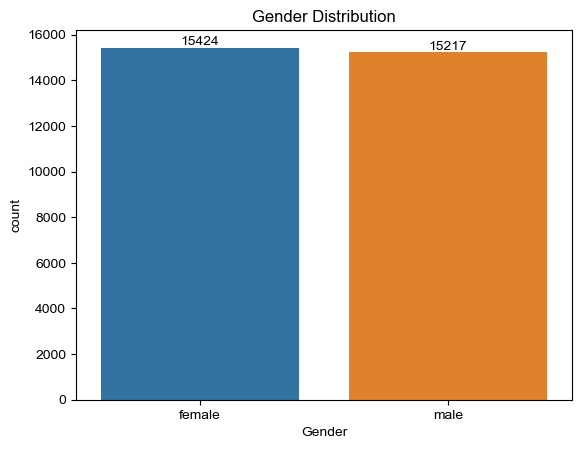

In [11]:
# Gender distribution
plt.title('Gender Distribution')
ax =sns.countplot(x='Gender',data =df)
for bars in ax.containers:
    ax.bar_label(bars)
sns.set(rc={'figure.figsize':(15,5)})

From the above graph we have analyzed that the number of females in the data are more than the number of males

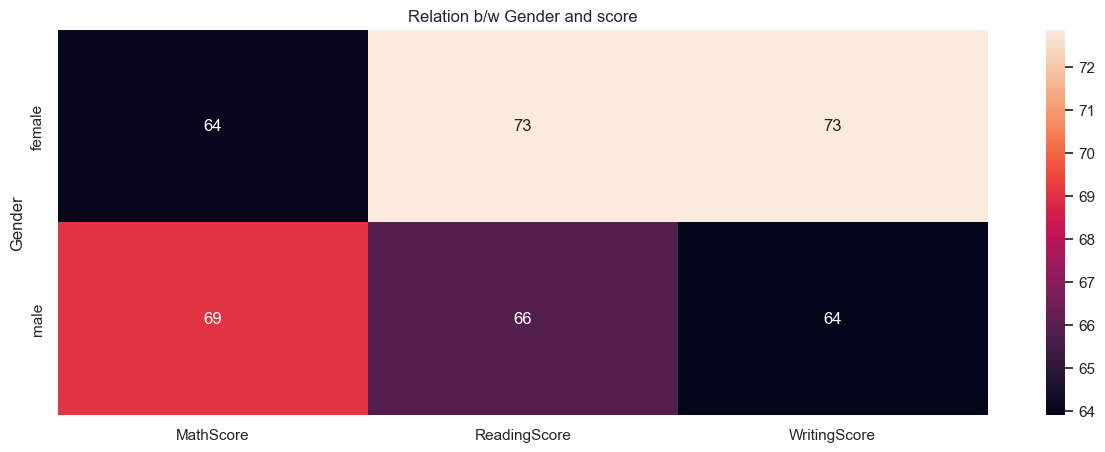

In [12]:
plt.title('Relation b/w Gender and score')
gb = df.groupby('Gender').agg({"MathScore":'mean','ReadingScore':'mean','WritingScore':'mean'})
sns.heatmap(gb,annot=True)
plt.show()

From the above chart we can observe that the Female are getting good marks in Reading and Writing test when compared to Males. but Males are getting good marks in maths and lacking in other subject's when compared with Females

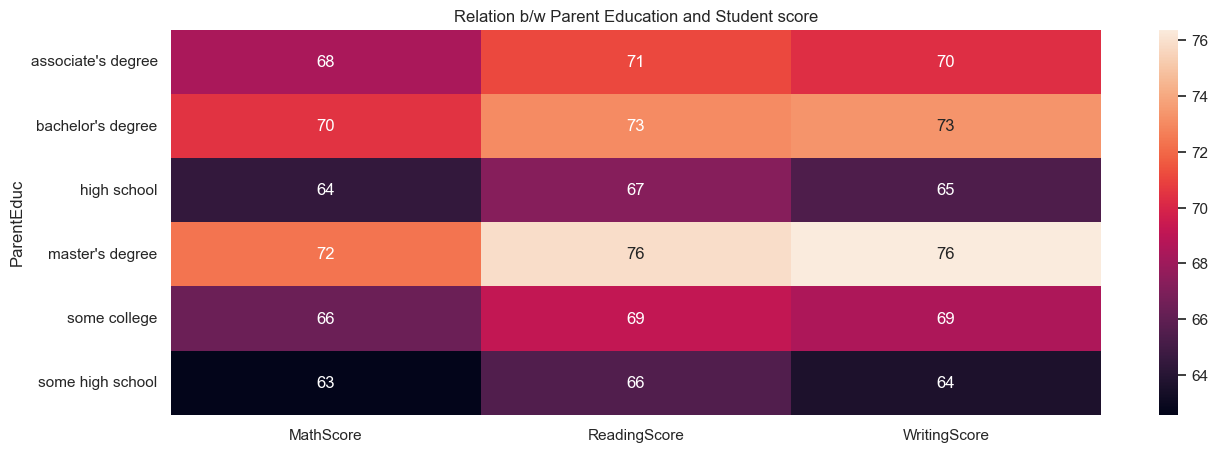

In [13]:
plt.title('Relation b/w Parent Education and Student score')
sns.set(rc={'figure.figsize':(15,5)})
gb = df.groupby('ParentEduc').agg({"MathScore":'mean','ReadingScore':'mean','WritingScore':'mean'})
sns.heatmap(gb,annot=True)
plt.show()

From the above chart we have concluded that the education of the parents have a good impacton there scores

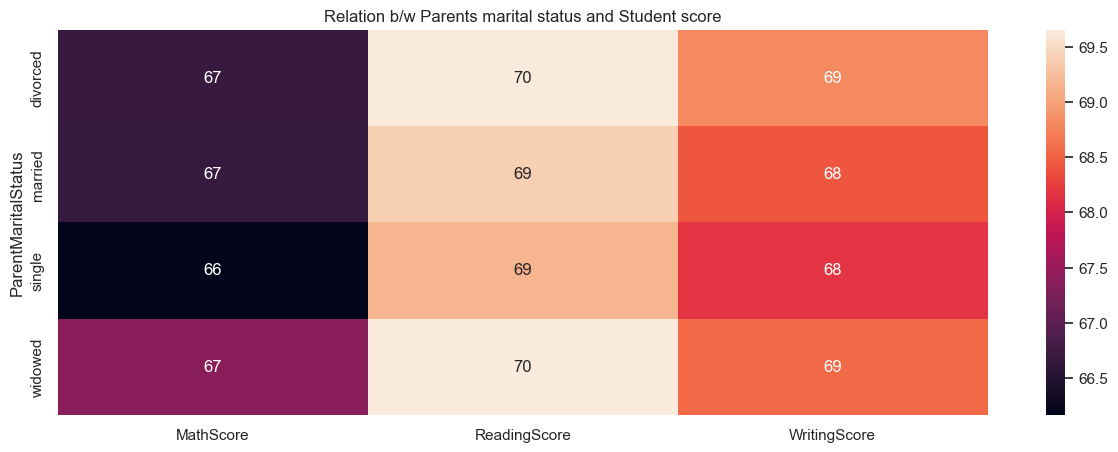

In [14]:
plt.title('Relation b/w Parents marital status and Student score')
sns.set(rc={'figure.figsize':(20,5)})
gb = df.groupby('ParentMaritalStatus').agg({"MathScore":'mean','ReadingScore':'mean','WritingScore':'mean'})
sns.heatmap(gb,annot=True)
plt.show()

From the above graph we have concluded that there is no/negligible impact on the student score due to parents marital status

Checking for outliers in the marks scored by the students 

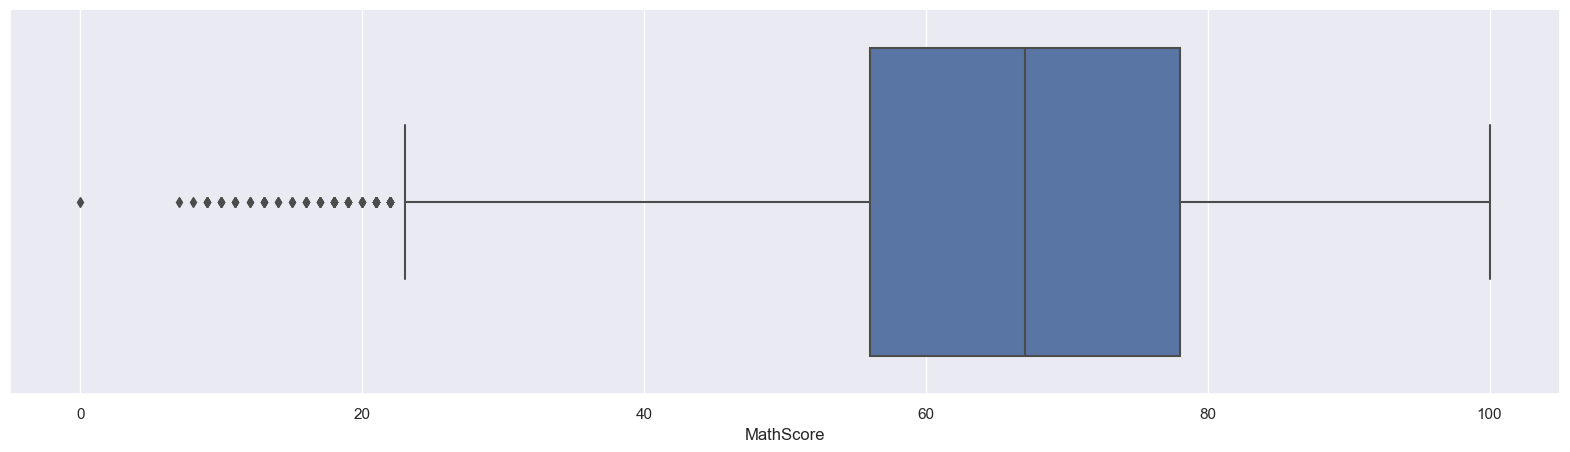

In [15]:
sns.set(rc={'figure.figsize':(20,5)})
sns.boxplot(data = df, x ='MathScore')
plt.show()

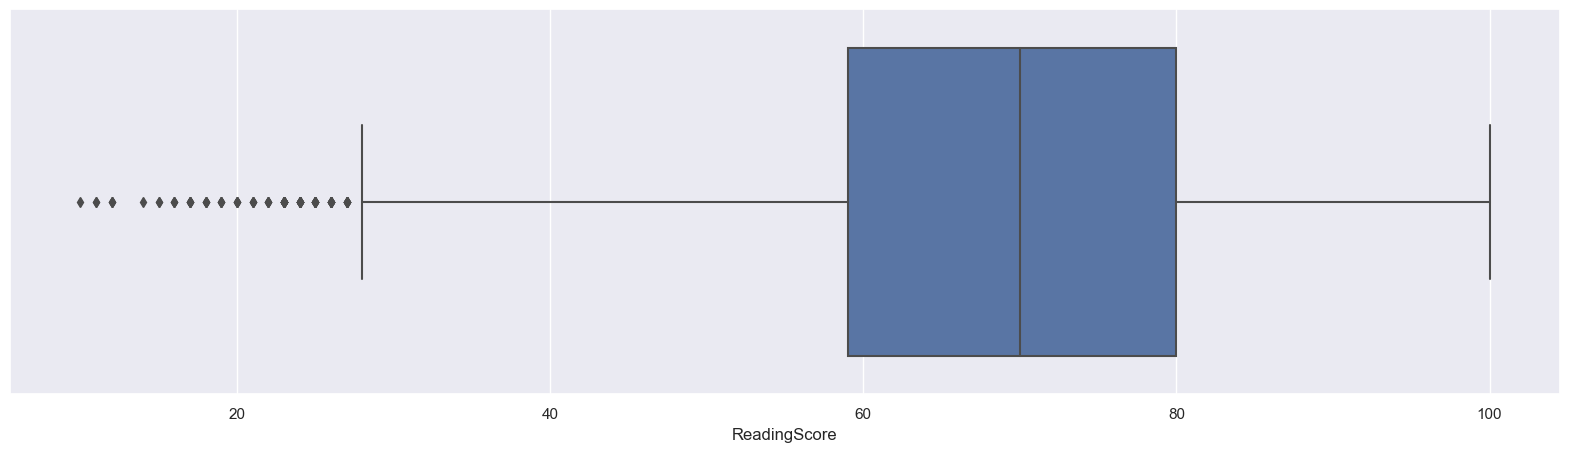

In [16]:
sns.set(rc={'figure.figsize':(20,5)})
sns.boxplot(data = df, x ='ReadingScore')
plt.show()

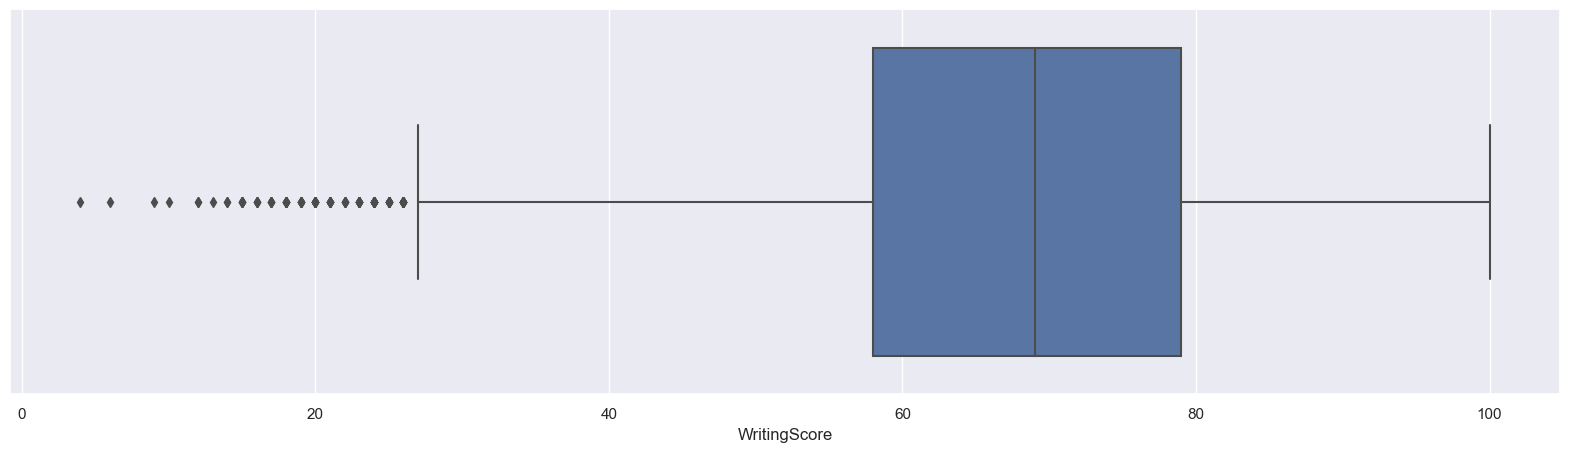

In [17]:
sns.set(rc={'figure.figsize':(20,5)})
sns.boxplot(data = df, x ='WritingScore')
plt.show()

From the above graphs we can say that their are some students who scored less than the avg score by others

In [18]:
print(df['EthnicGroup'].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


### Distribution of Ethnic Groups

In [19]:
groupA = df.loc[(df['EthnicGroup']=='group A')].count()
groupB = df.loc[(df['EthnicGroup']=='group B')].count()
groupC = df.loc[(df['EthnicGroup']=='group C')].count()
groupD = df.loc[(df['EthnicGroup']=='group D')].count()
groupE = df.loc[(df['EthnicGroup']=='group E')].count()

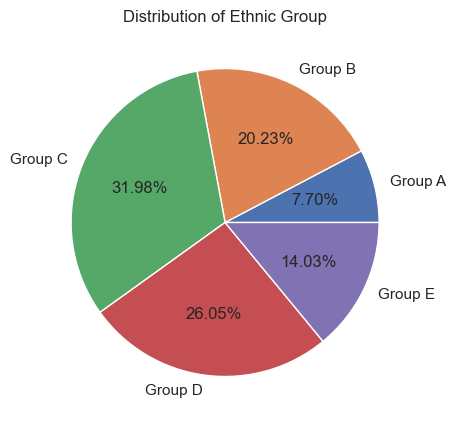

In [20]:
a = [groupA['EthnicGroup'],groupB['EthnicGroup'],groupC['EthnicGroup'],groupD['EthnicGroup'],groupE['EthnicGroup']]
l =['Group A','Group B','Group C','Group D','Group E']
plt.pie(a, labels=l,autopct='%1.2f%%')
plt.title('Distribution of Ethnic Group')
plt.show()

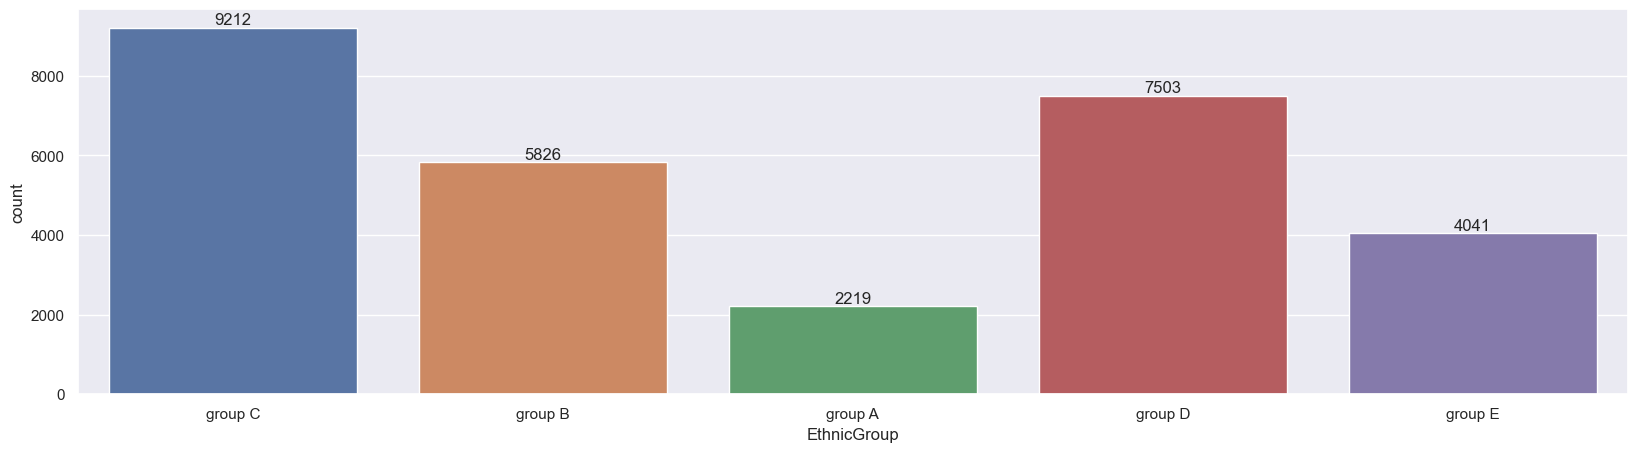

In [21]:
ax =sns.countplot(data = df,x = 'EthnicGroup')
ax.bar_label(ax.containers[0])
plt.show()

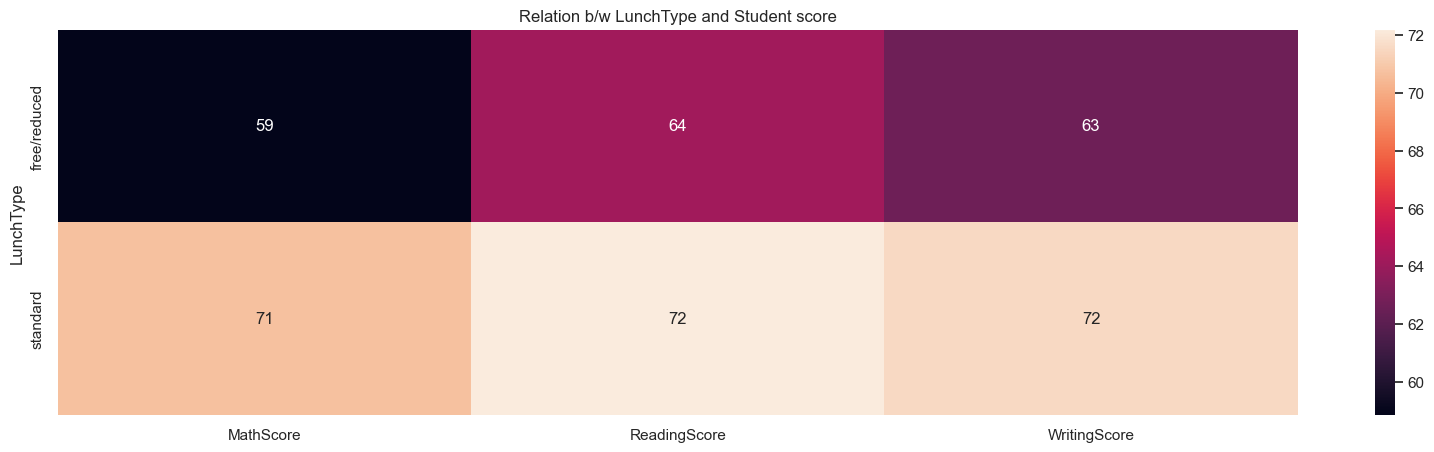

In [22]:
plt.title('Relation b/w LunchType and Student score')
gb = df.groupby('LunchType').agg({"MathScore":'mean','ReadingScore':'mean','WritingScore':'mean'})
sns.heatmap(gb,annot=True)
plt.show()

From the above chart we can say that the students with standard Lunch have good scores

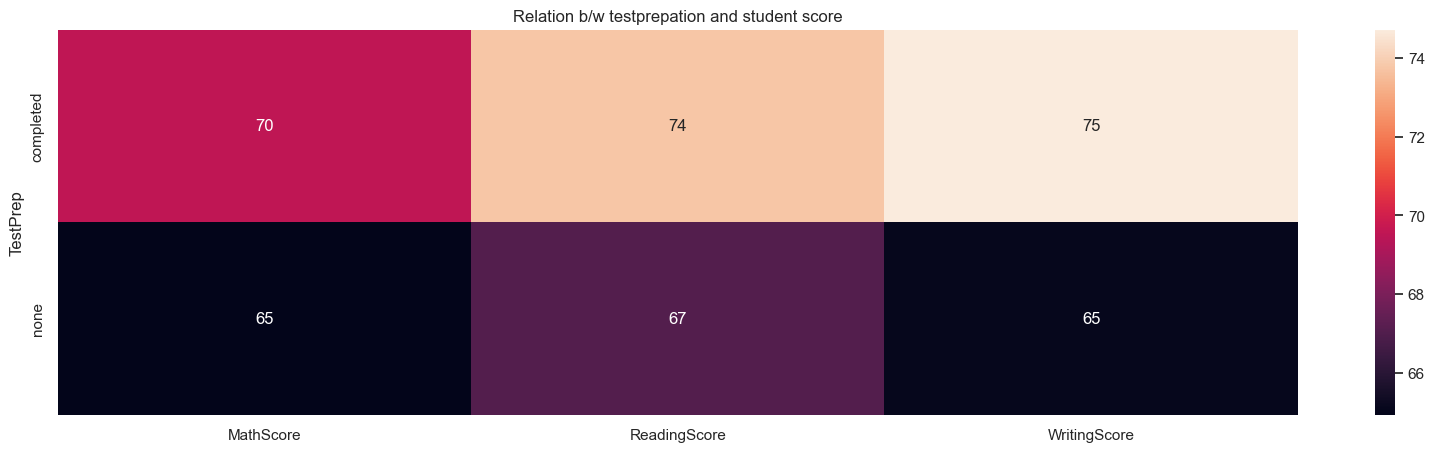

In [23]:
plt.title('Relation b/w testprepation and student score')
gb = df.groupby('TestPrep').agg({"MathScore":'mean','ReadingScore':'mean','WritingScore':'mean'})
sns.heatmap(gb,annot=True)
plt.show()

From the above observation we can say that the students who prepares for the test completly have good chance of getting good marks in the exams

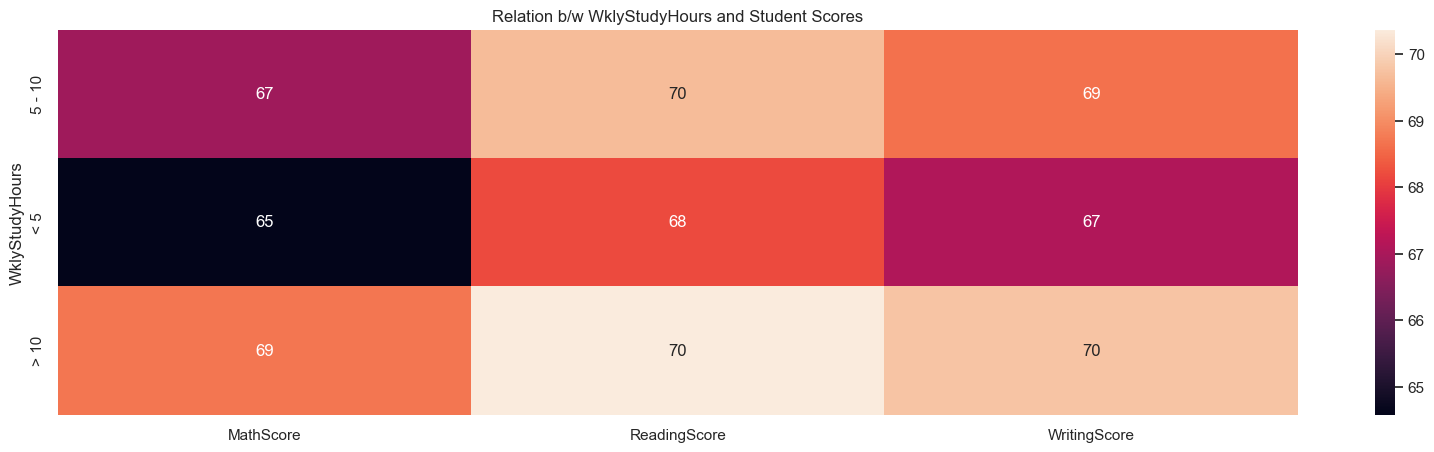

In [24]:
plt.title('Relation b/w WklyStudyHours and Student Scores')
gb = df.groupby('WklyStudyHours').agg({"MathScore":'mean','ReadingScore':'mean','WritingScore':'mean'})
sns.heatmap(gb,annot=True)
plt.show()

From above chart we can observe that their is no such difference in the scores with the weekly study hours of the students

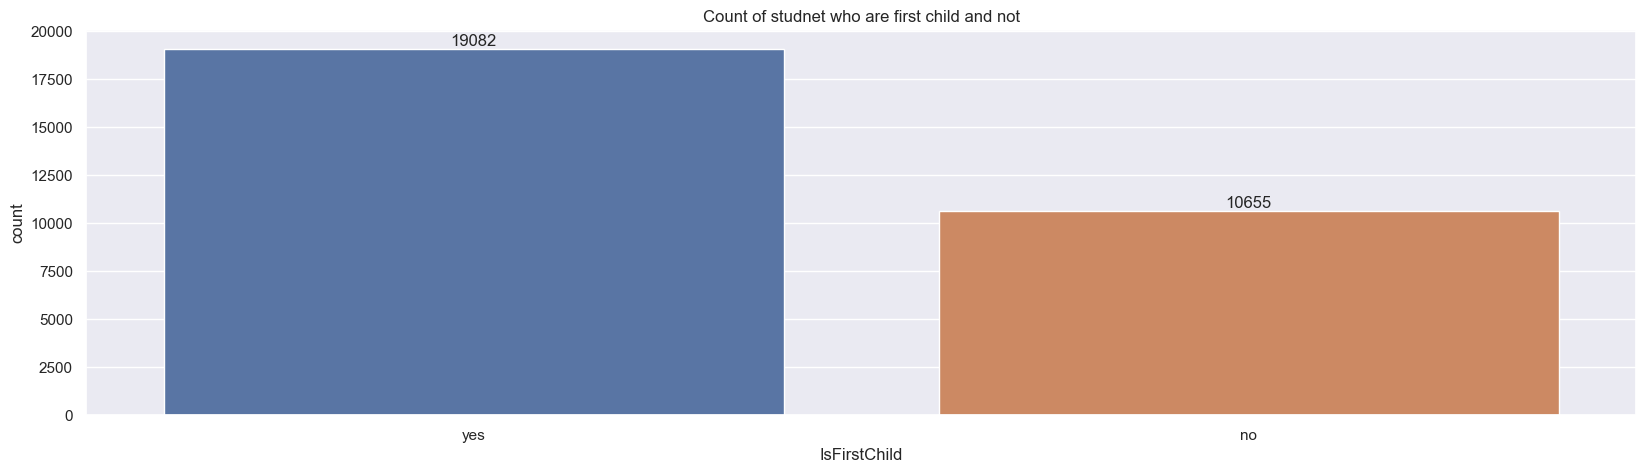

In [25]:
# checking the count of students whether they are first child or not
plt.title('Count of studnet who are first child and not')
ax = sns.countplot(data = df,x = 'IsFirstChild')
ax.bar_label(ax.containers[0])
plt.show()

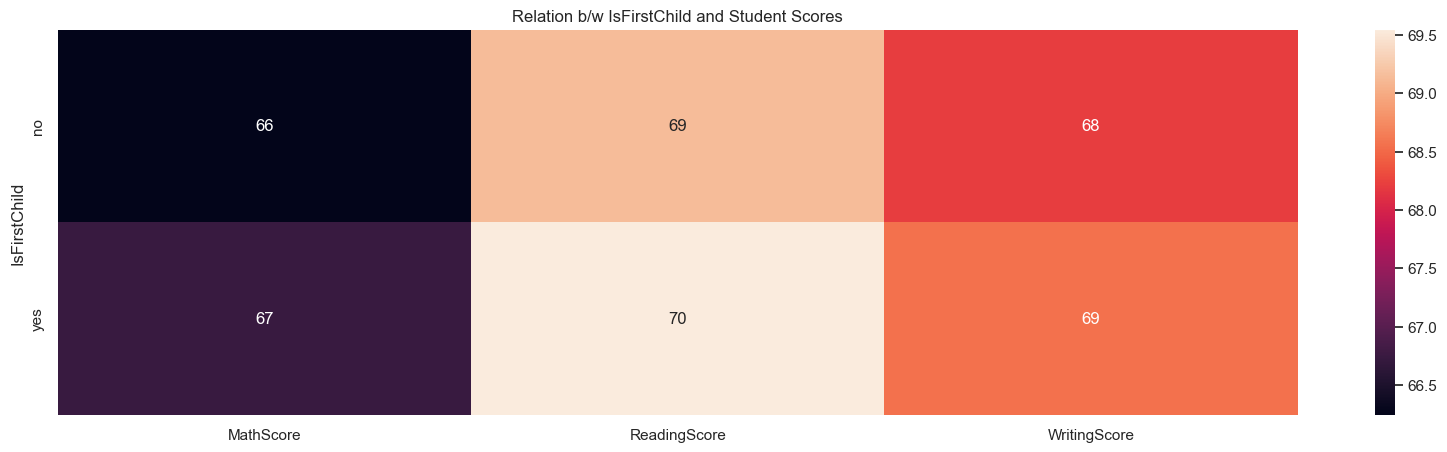

In [26]:
plt.title('Relation b/w IsFirstChild and Student Scores')
gb = df.groupby('IsFirstChild').agg({"MathScore":'mean','ReadingScore':'mean','WritingScore':'mean'})
sns.heatmap(gb,annot=True)
plt.show()

From the above chart we can observe that their is no such difference in the score based on whether their are first child or not

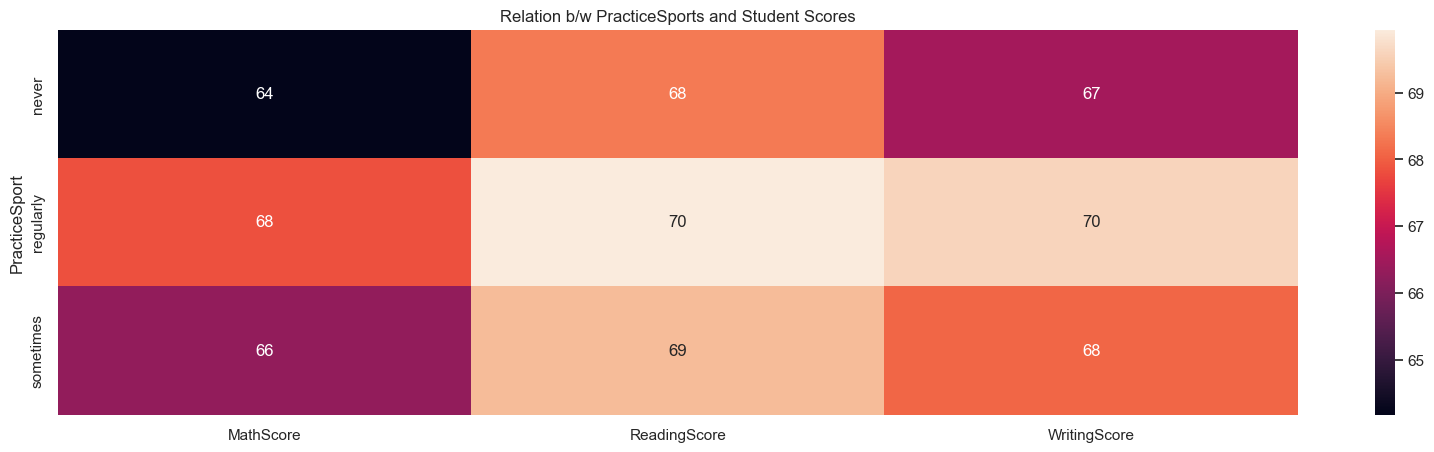

In [27]:
plt.title('Relation b/w PracticeSports and Student Scores')
gb = df.groupby('PracticeSport').agg({"MathScore":'mean','ReadingScore':'mean','WritingScore':'mean'})
sns.heatmap(gb,annot=True)
plt.show()

From the above chart we can observe that the students who participate in sports regulary have a chance of getting good marks than others

## Conclusion

From all the observation we can say that :
1) the Parents Education impact on Student Performance espacially with higher education like Masters Degree
2) Lunch type also impact on student type especially the students with standard lunch type
3) Student who participate in sports regulary have good chance of getting good marks